# Ein Dataset laden

In [1]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Erster Blick auf die Datenstruktur

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels.shape

(60000,)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
set(test_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [7]:
train_images.dtype

dtype('uint8')

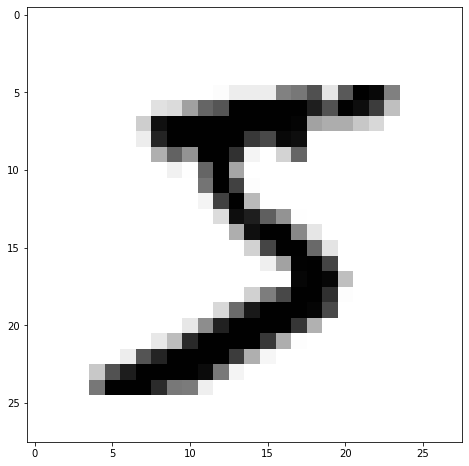

In [8]:
digit = train_images[0]

import matplotlib.pyplot as plt 
plt.figure(figsize=(8,8))
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()


In [9]:
print(train_labels[0])

5


# Die Netzwerk-Architektur


In [12]:
from tensorflow.keras import models 
from tensorflow.keras import layers 

model = models.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax') 
])

In [13]:
model.compile(optimizer='rmsprop', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Daten vorbereiten

In [14]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Das Training

In [15]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4339 - accuracy: 0.8751
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1085 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0693 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0474 - accuracy: 0.9861
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0349 - accuracy: 0.9896


# Vorhersagen machen

In [17]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([4.1951040e-08, 1.6578076e-10, 4.3351966e-07, 3.0818115e-05,
       8.5948859e-11, 1.2294652e-08, 5.3008802e-13, 9.9996603e-01,
       2.7777079e-07, 2.3339676e-06], dtype=float32)

In [18]:
predictions[0].argmax()

7

In [19]:
test_labels[0]

7

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 575us/step - loss: 0.0734 - accuracy: 0.9775
test_acc: 0.9775000214576721


# Übung

* neue Modelle mit 100 trainingssamples trainieren
* Jeweils train und test accuracy berechnen.

# Übung2

* fashion_mnist ziehen
* shape, ndim, dtype und labels herausfinden
* model trainieren

In [20]:
from tensorflow.keras.datasets import fashion_mnist

In [21]:
(train_data,train_target),(test_data,test_target) = fashion_mnist.load_data()

In [22]:
print(train_data.shape)
print(test_data.shape)
print(len(train_target),len(test_target))

(60000, 28, 28)
(10000, 28, 28)
60000 10000


In [23]:
sorted(list(set(train_target)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

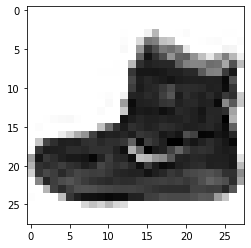

In [24]:
plt.imshow(train_data[0], cmap=plt.cm.binary)
plt.show()

In [25]:
fashion_model = models.Sequential([layers.Dense(512,activation='relu'),layers.Dense(10,activation='softmax')])

In [26]:
train_data = train_data.reshape((60000,28*28))
train_data = train_data.astype('float32')/255
test_data = test_data.reshape((10000,28*28))
test_data = test_data.astype('float32')/255

In [27]:
fashion_model.compile(optimizer='rmsprop', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])


In [28]:
fashion_model.fit(train_data,train_target,epochs = 10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.7421 - accuracy: 0.7443
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3986 - accuracy: 0.8552
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3402 - accuracy: 0.8751
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3147 - accuracy: 0.8826
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2877 - accuracy: 0.8934
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2747 - accuracy: 0.9001
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2603 - accuracy: 0.9048
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2487 - accuracy: 0.9059
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2370 - accuracy: 0.9119
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2280 - accuracy: 0.9162

In [29]:
predictions = fashion_model.predict(test_data)

In [30]:
fashion_model.evaluate(test_data,test_target)

313/313 [==============================] - 0s 594us/step - loss: 0.3511 - accuracy: 0.8882


[0.3510652780532837, 0.8881999850273132]